# Toadx2 API Project

---

# Real Estate Data Analysis & Prediction

This notebook presents the analysis and prediction of South Korean real estate data using historical trends and predictive modeling. The data includes both sale and rent indices, as well as average prices. 

The predictions are made using the GEMMA2 model, fine-tuned on this specific real estate dataset. We'll compare historical data with future predictions and evaluate trends in sale and rent indices.

## Content:
1. Introduction
2. Historical Data
    - Sale Index & Average Sale Price
    - Rent Index & Average Rent Price
3. Predicted Data
    - Predicted Sale Index & Average Sale Price
    - Predicted Rent Index & Average Rent Price
4. Conclusion

<br />

---


## 2. Historical Data

In [19]:
import pandas as pd
from sqlalchemy.orm import sessionmaker
from src.database.models.database_model import PropertyPriceData, Prediction, Region
from src.database.database import engine

%matplotlib inline

### Database connection

In [33]:
Session = sessionmaker(bind=engine)
session = Session()


def get_historical_data(session, price_type):
    historical_data = session.query(PropertyPriceData).filter_by(price_type=price_type).all()
    data = [{'date': d.date, 'index_value': d.index_value, 'avg_price': d.avg_price, 'region_code': d.region_code} for d
            in historical_data]
    df = pd.DataFrame(data)
    return df


def get_predicted_data(session, price_type):
    predicted_data = session.query(Prediction).filter_by(price_type=price_type).all()
    data = [{'date': p.date, 'predicted_index': p.predicted_index, 'predicted_price': p.predicted_price,
             'region_code': p.region_code} for p in predicted_data]
    df = pd.DataFrame(data)
    return df


sale_historical = get_historical_data(session, "sale").sort_values(by='date')
rent_historical = get_historical_data(session, "rent").sort_values(by='date')

sale_predicted = get_predicted_data(session, "sale").sort_values(by='date')
rent_predicted = get_predicted_data(session, "rent").sort_values(by='date')


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)
INFO:sqlalchemy.engine.Engine:SELECT kb_property_price_data.id AS kb_property_price_data_id, kb_property_price_data.region_code AS kb_property_price_data_region_code, kb_property_price_data.date AS kb_property_price_data_date, kb_property_price_data.price_type AS kb_property_price_data_price_type, kb_property_price_data.index_value AS kb_property_price_data_index_value, kb_property_price_data.avg_price AS kb_property_price_data_avg_price, kb_property_price_data.is_interpolated AS kb_property_price_data_is_interpolated 
FROM kb_property_price_data 
WHERE kb_property_price_data.price_type = %(price_type_1)s
INFO:sqlalchemy.engine.Engine:[cached since 3579s ago] {'price_type_1': 'sale'}
INFO:sqlalchemy.engine.Engine:SELECT kb_property_price_data.id AS kb_property_price_data_id, kb_property_price_data.region_code AS kb_property_price_data_region_code, kb_property_price_data.date AS kb_property_price_data_date, kb_property_price_data.price_type

### 2.1 Sale Index and Average Sale Price

INFO:sqlalchemy.engine.Engine:SELECT kb_region.region_code AS kb_region_region_code, kb_region.region_name_eng AS kb_region_region_name_eng 
FROM kb_region
INFO:sqlalchemy.engine.Engine:[cached since 3576s ago] {}


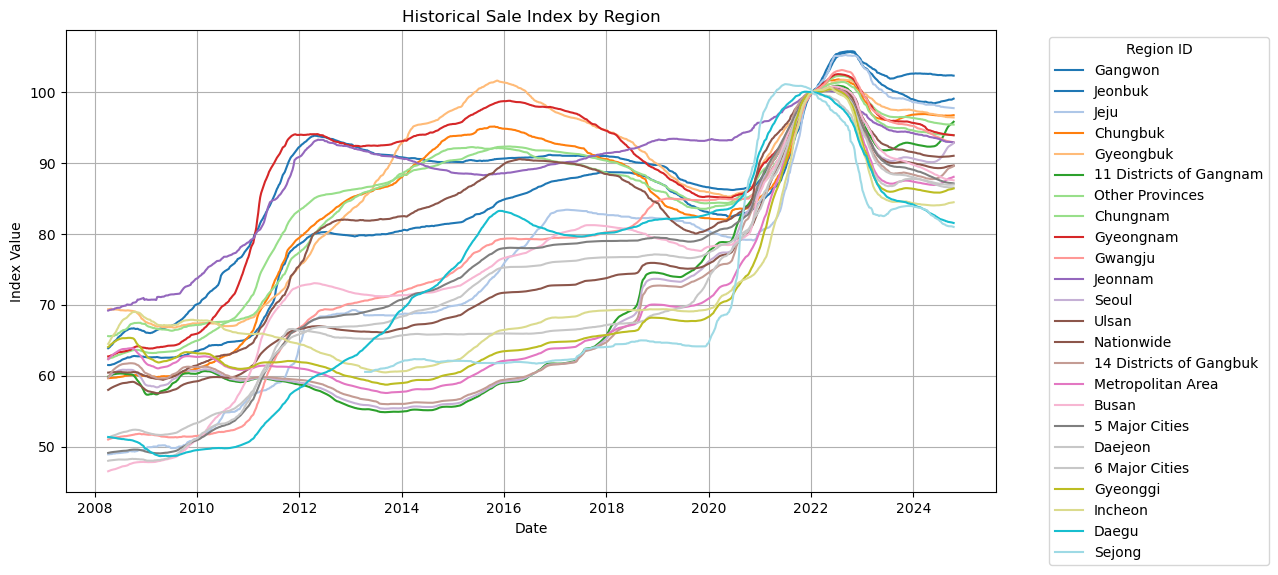

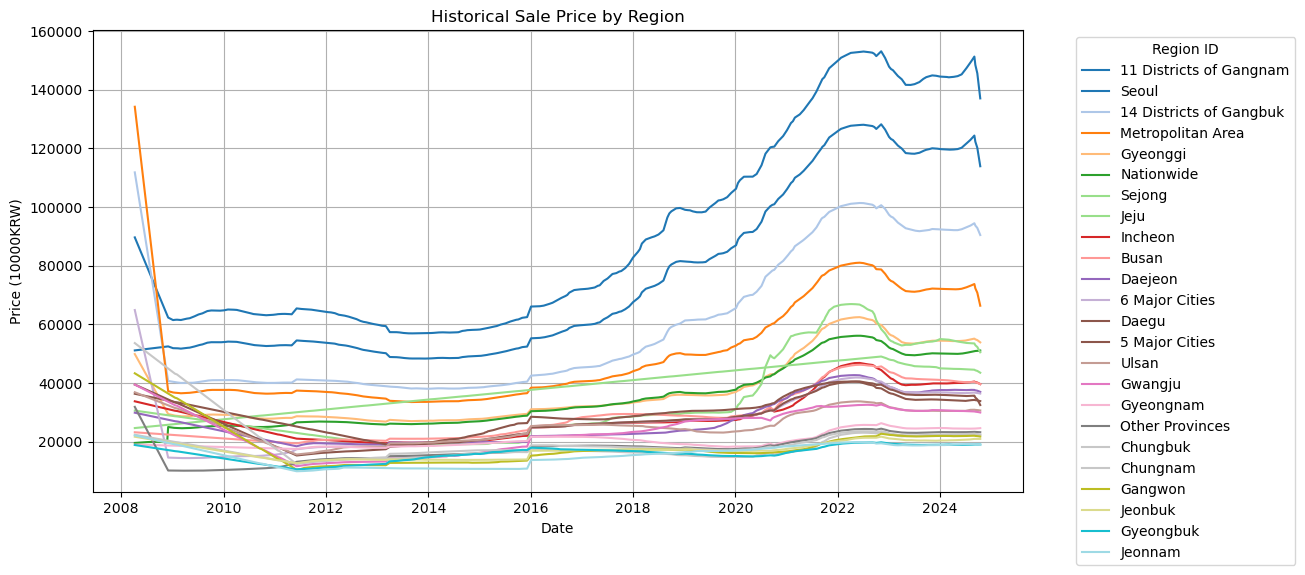

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# region_code와 region_name을 매핑하기 위한 함수
def get_region_name_mapping(session):
    # 모든 region_code와 region_name_eng을 가져옴
    regions = session.query(Region.region_code, Region.region_name_eng).all()
    # 딕셔너리 형태로 매핑
    return {region.region_code: region.region_name_eng for region in regions}

# region_code와 region_name 매핑 가져오기
region_name_mapping = get_region_name_mapping(session)

# 컬러맵 정의 (tab20 사용)
regions = sale_historical['region_code'].unique()
color_map = plt.colormaps['tab20']

# 각 지역의 마지막 날짜의 매매 지수를 기준으로 정렬
last_sale_index = []
for region in regions:
    sale_historical_data = sale_historical[sale_historical['region_code'] == region]
    if not sale_historical_data.empty:
        last_index = sale_historical_data.iloc[-1]['index_value']
        last_sale_index.append((region, last_index))

# 매매 지수 순으로 정렬
sorted_regions = [region for region, index in sorted(last_sale_index, key=lambda x: x[1], reverse=True)]

# Sale Index Plot (Region별로 다른 선)
plt.figure(figsize=(12, 6))

for idx, region in enumerate(sorted_regions):
    region_data = sale_historical[sale_historical['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['index_value'],
             label=f'{region_name}',
             color=color_map(idx / len(regions)))  # idx를 정규화하여 사용

plt.title('Historical Sale Index by Region')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(title='Region ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 각 지역의 마지막 날짜의 매매 가격을 기준으로 정렬
last_sale_price = []
for region in regions:
    sale_historical_data = sale_historical[sale_historical['region_code'] == region]
    if not sale_historical_data.empty:
        last_price = sale_historical_data.iloc[-1]['avg_price']
        last_sale_price.append((region, last_price))

# 매매 가격 순으로 정렬
sorted_regions_price = [region for region, price in sorted(last_sale_price, key=lambda x: x[1], reverse=True)]

# Sale Price Plot (Region별로 다른 선)
plt.figure(figsize=(12, 6))

for idx, region in enumerate(sorted_regions_price):
    region_data = sale_historical[sale_historical['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['avg_price'],
             label=f'{region_name}',
             color=color_map(idx / len(regions)))  # idx를 정규화하여 사용

plt.title('Historical Sale Price by Region')
plt.xlabel('Date')
plt.ylabel('Price (10000KRW)')
plt.legend(title='Region ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 2.2 Rent Index and Average Rent Price

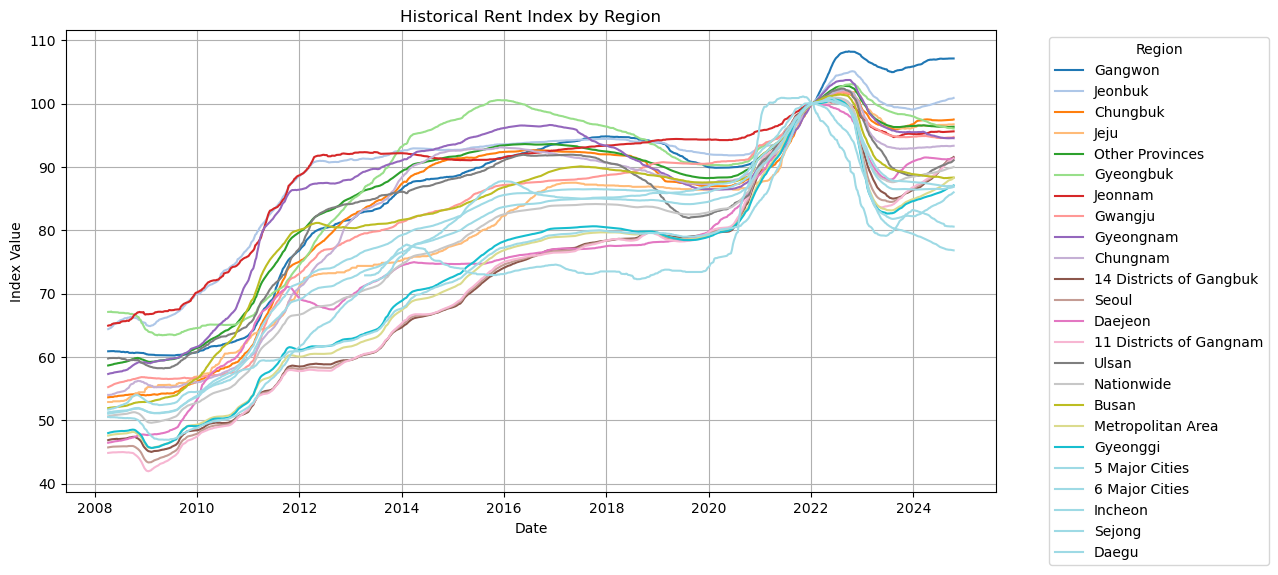

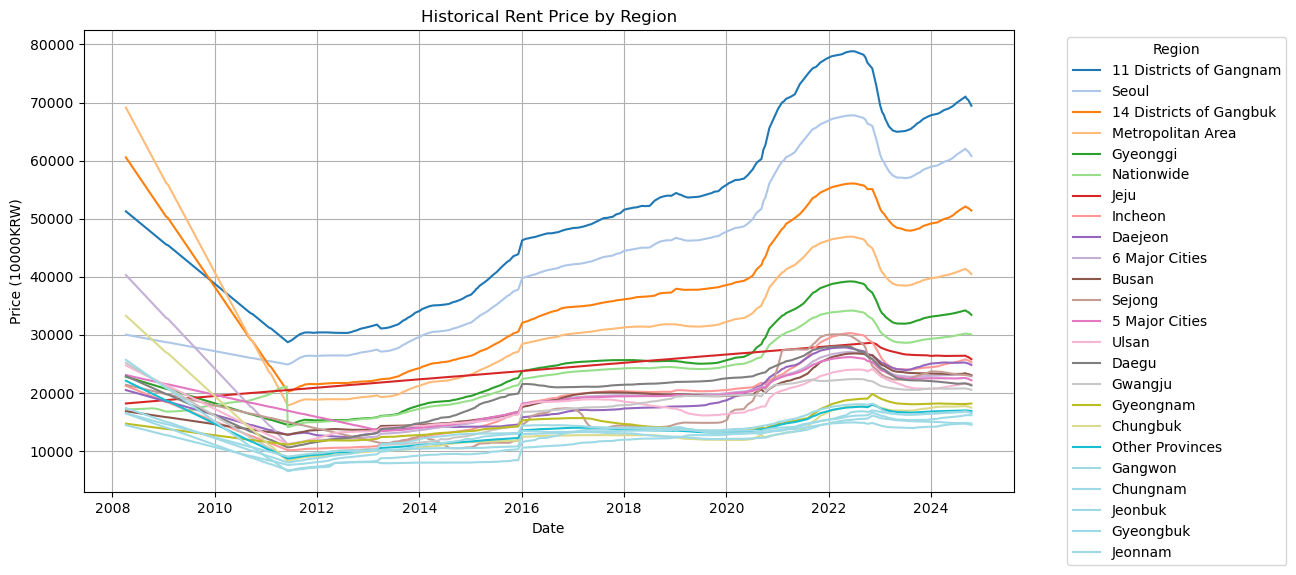

In [35]:
# 컬러맵 정의 (tab20 사용)
regions = rent_historical['region_code'].unique()
color_map = plt.colormaps['tab20'] # 더 많은 색상 제공

# 각 지역의 마지막 날짜의 전세 지수를 기준으로 정렬
last_rent_index = []
for region in regions:
    rent_historical_data = rent_historical[rent_historical['region_code'] == region]
    if not rent_historical_data.empty:
        last_index = rent_historical_data.iloc[-1]['index_value']
        last_rent_index.append((region, last_index))

# 전세 지수 순으로 정렬
sorted_regions = [region for region, index in sorted(last_rent_index, key=lambda x: x[1], reverse=True)]

# Rent Index Plot
plt.figure(figsize=(12, 6))

for idx, region in enumerate(sorted_regions):
    region_data = rent_historical[rent_historical['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['index_value'], label=region_name, color=color_map(idx))

plt.title('Historical Rent Index by Region')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.show()

# Rent Price Plot
plt.figure(figsize=(12, 6))

# 각 지역의 마지막 날짜의 전세 가격을 기준으로 정렬
last_rent_price = []
for region in regions:
    rent_historical_data = rent_historical[rent_historical['region_code'] == region]
    if not rent_historical_data.empty:
        last_price = rent_historical_data.iloc[-1]['avg_price']
        last_rent_price.append((region, last_price))

# 전세 가격 순으로 정렬
sorted_regions_price = [region for region, price in sorted(last_rent_price, key=lambda x: x[1], reverse=True)]

for idx, region in enumerate(sorted_regions_price):
    region_data = rent_historical[rent_historical['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['avg_price'], label=region_name, color=color_map(idx))

plt.title('Historical Rent Price by Region')
plt.xlabel('Date')
plt.ylabel('Price (10000KRW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.show()

## 3. Predicted Data
### 3.1 Sale Index and Average Sale Price Predictions

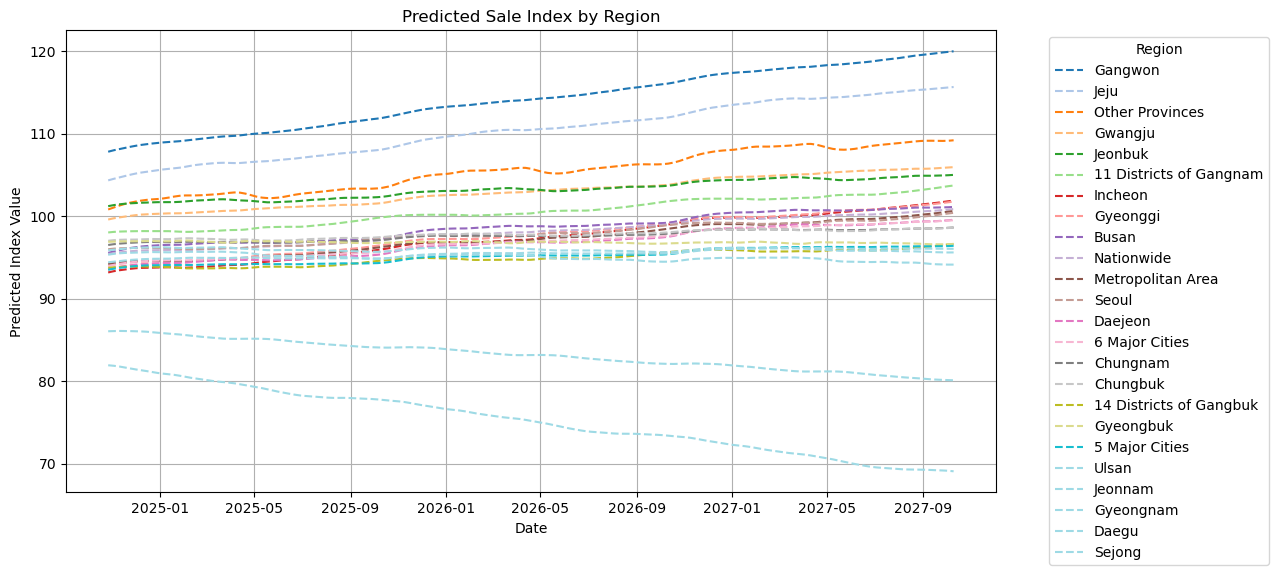

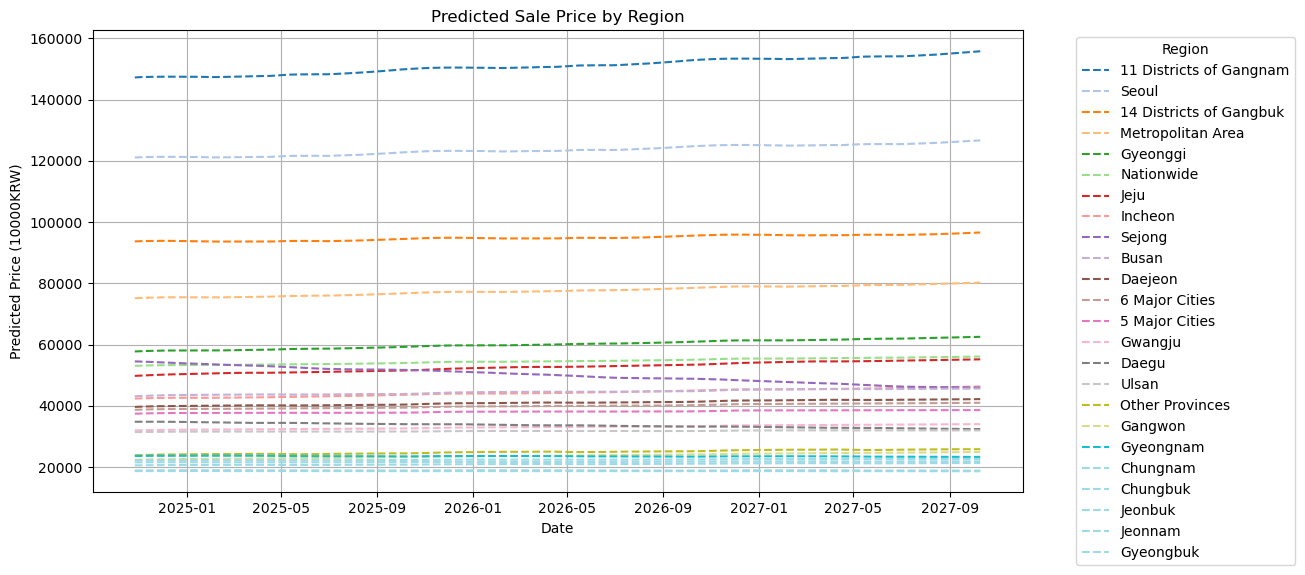

In [36]:
# 컬러맵 정의 (tab20 사용)
regions = sale_predicted['region_code'].unique()
color_map = plt.colormaps['tab20'] # 더 많은 색상 제공

# 각 지역의 마지막 날짜의 매매 지수를 기준으로 정렬
last_sale_index = []
for region in regions:
    sale_predicted_data = sale_predicted[sale_predicted['region_code'] == region]
    if not sale_predicted_data.empty:
        last_index = sale_predicted_data.iloc[-1]['predicted_index']
        last_sale_index.append((region, last_index))

# 매매 지수 순으로 정렬
sorted_regions = [region for region, index in sorted(last_sale_index, key=lambda x: x[1], reverse=True)]

# Predicted Sale Index Plot
plt.figure(figsize=(12, 6))

for idx, region in enumerate(sorted_regions):
    region_data = sale_predicted[sale_predicted['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['predicted_index'], label=region_name,
             color=color_map(idx), linestyle='dashed')

plt.title('Predicted Sale Index by Region')
plt.xlabel('Date')
plt.ylabel('Predicted Index Value')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.show()

# Predicted Sale Price Plot
plt.figure(figsize=(12, 6))

# 각 지역의 마지막 날짜의 매매 가격을 기준으로 정렬
last_sale_price = []
for region in regions:
    sale_predicted_data = sale_predicted[sale_predicted['region_code'] == region]
    if not sale_predicted_data.empty:
        last_price = sale_predicted_data.iloc[-1]['predicted_price']
        last_sale_price.append((region, last_price))

# 매매 가격 순으로 정렬
sorted_regions_price = [region for region, price in sorted(last_sale_price, key=lambda x: x[1], reverse=True)]

for idx, region in enumerate(sorted_regions_price):
    region_data = sale_predicted[sale_predicted['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['predicted_price'], label=region_name,
             color=color_map(idx), linestyle='dashed')

plt.title('Predicted Sale Price by Region')
plt.xlabel('Date')
plt.ylabel('Predicted Price (10000KRW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.show()

### 3.2 Rent Index and Average Rent Price Predictions

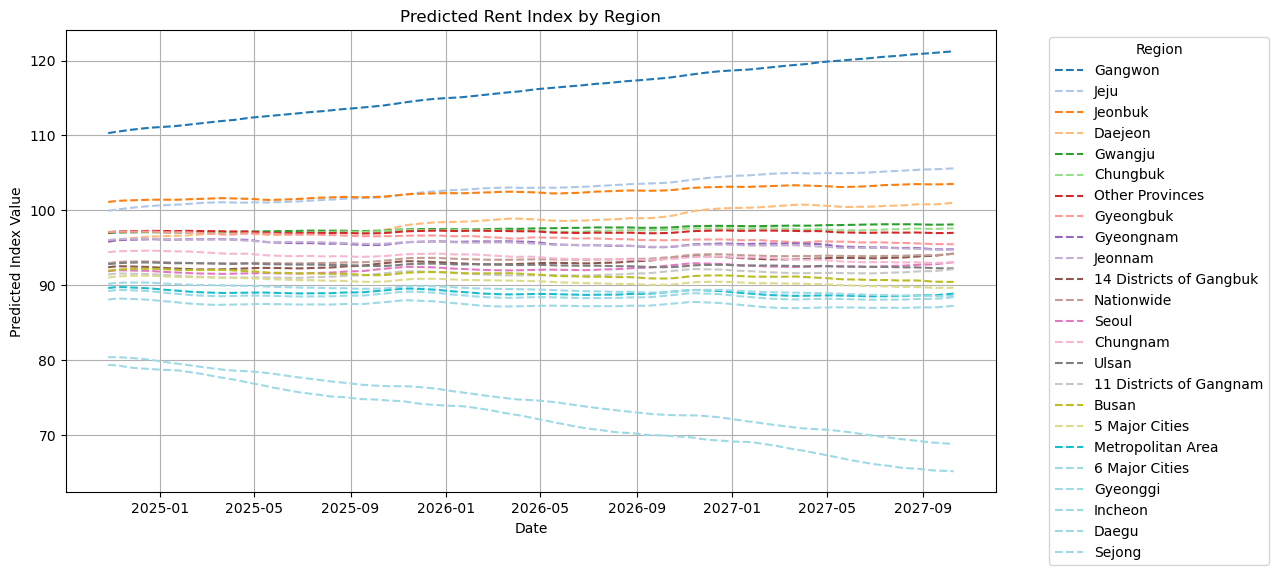

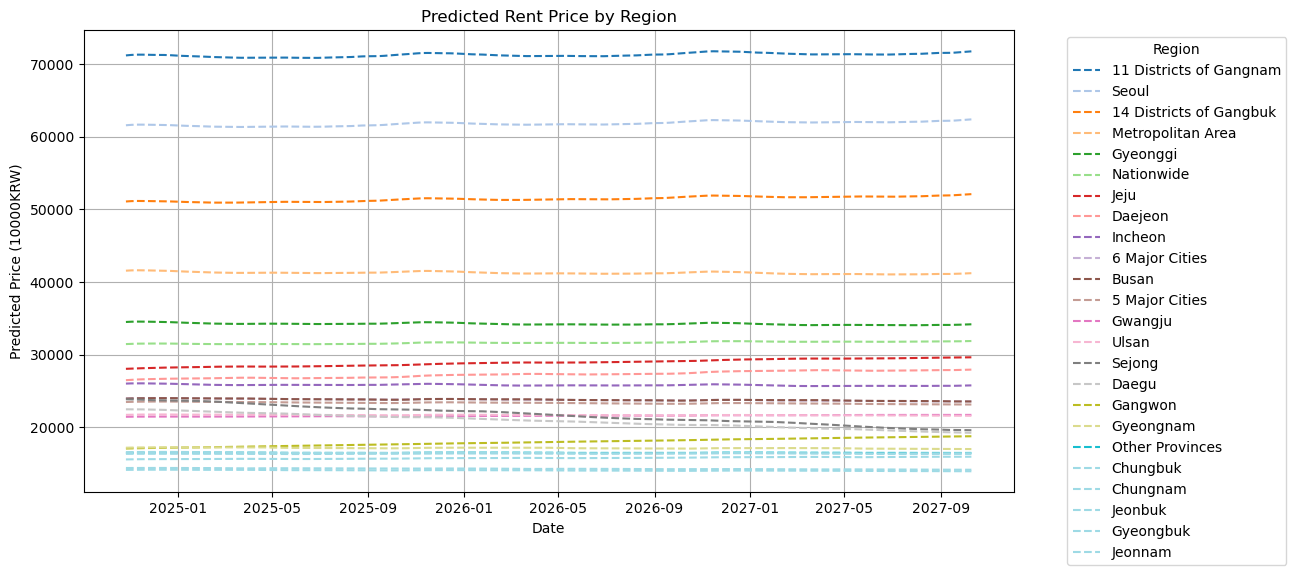

In [37]:
# 컬러맵 정의 (tab20 사용)
regions = rent_predicted['region_code'].unique()
color_map = plt.colormaps['tab20']  # 더 많은 색상 제공

# 각 지역의 마지막 날짜의 전세 지수를 기준으로 정렬
last_rent_index = []
for region in regions:
    rent_predicted_data = rent_predicted[rent_predicted['region_code'] == region]
    if not rent_predicted_data.empty:
        last_index = rent_predicted_data.iloc[-1]['predicted_index']
        last_rent_index.append((region, last_index))

# 전세 지수 순으로 정렬
sorted_regions = [region for region, index in sorted(last_rent_index, key=lambda x: x[1], reverse=True)]

# Predicted Rent Index Plot
plt.figure(figsize=(12, 6))

for idx, region in enumerate(sorted_regions):
    region_data = rent_predicted[rent_predicted['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['predicted_index'], label=region_name,
             color=color_map(idx), linestyle='dashed')

plt.title('Predicted Rent Index by Region')
plt.xlabel('Date')
plt.ylabel('Predicted Index Value')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.show()

# Predicted Rent Price Plot
plt.figure(figsize=(12, 6))

# 각 지역의 마지막 날짜의 전세 가격을 기준으로 정렬
last_rent_price = []
for region in regions:
    rent_predicted_data = rent_predicted[rent_predicted['region_code'] == region]
    if not rent_predicted_data.empty:
        last_price = rent_predicted_data.iloc[-1]['predicted_price']
        last_rent_price.append((region, last_price))

# 전세 가격 순으로 정렬
sorted_regions_price = [region for region, price in sorted(last_rent_price, key=lambda x: x[1], reverse=True)]

for idx, region in enumerate(sorted_regions_price):
    region_data = rent_predicted[rent_predicted['region_code'] == region]
    region_name = region_name_mapping.get(region, f'Region {region}')
    plt.plot(region_data['date'], region_data['predicted_price'], label=region_name,
             color=color_map(idx), linestyle='dashed')

plt.title('Predicted Rent Price by Region')
plt.xlabel('Date')
plt.ylabel('Predicted Price (10000KRW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.show()

## 4. Conclusion

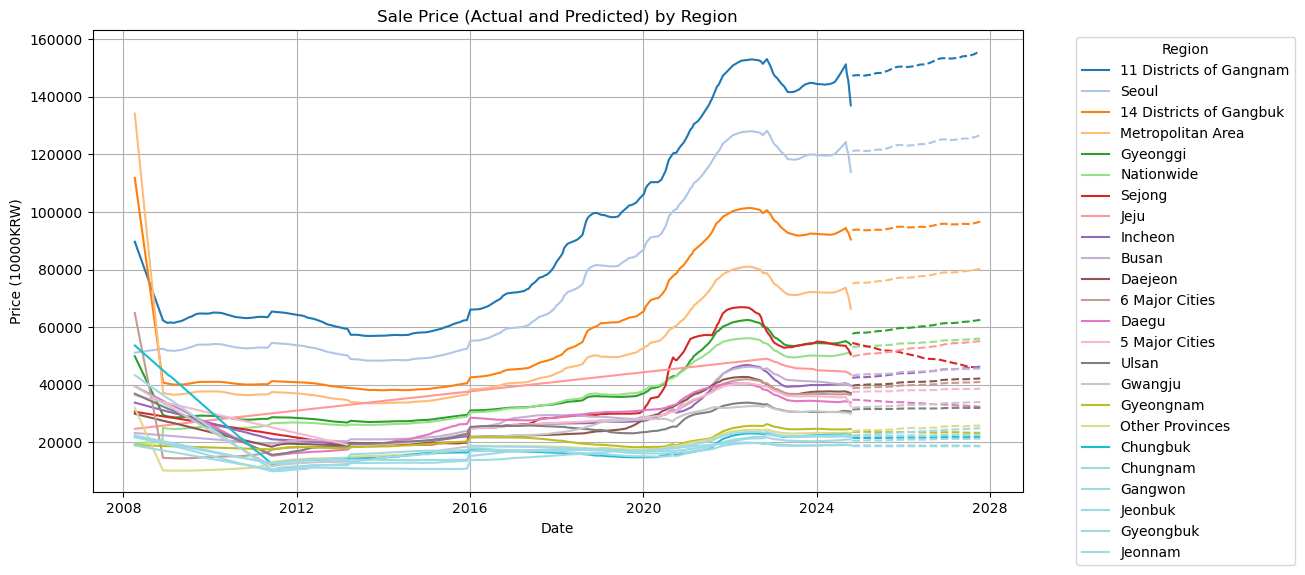

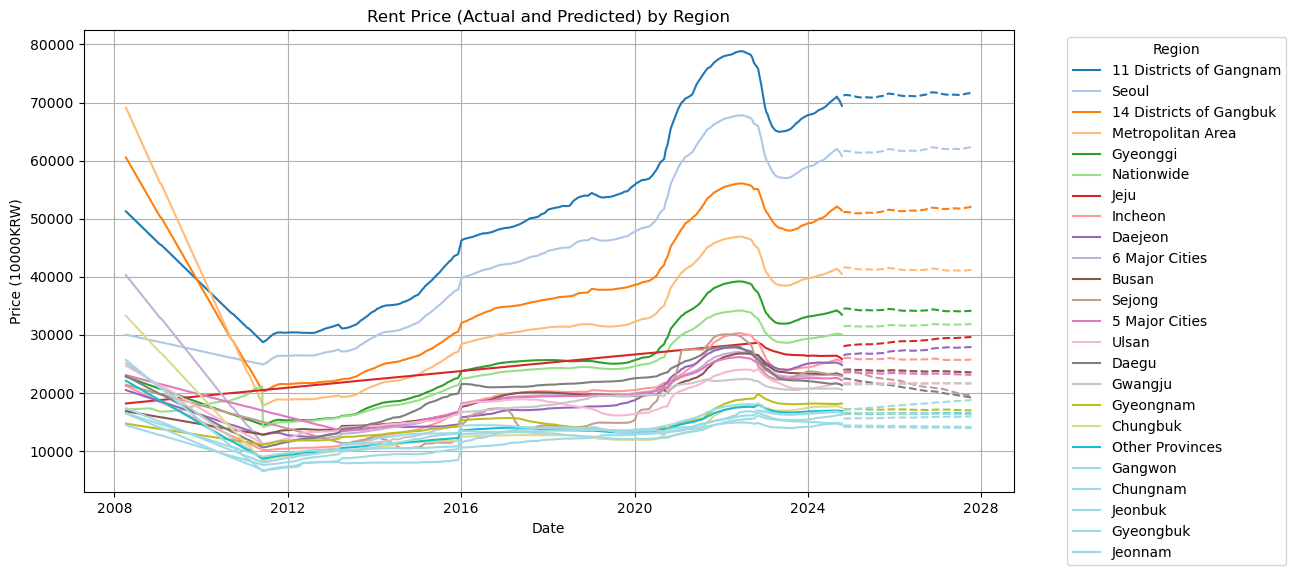

In [39]:
import matplotlib.cm as cm

regions = sale_historical['region_code'].unique()
color_map = plt.colormaps['tab20']

# Sale Price Plot (매매 가격 기록치 및 예측치)
plt.figure(figsize=(12, 6))

# 각 지역의 마지막 날짜의 매매 가격을 기준으로 정렬
last_prices = []
for region in regions:
    sale_historical_data = sale_historical[sale_historical['region_code'] == region]
    if not sale_historical_data.empty:
        last_price = sale_historical_data.iloc[-1]['avg_price']
        last_prices.append((region, last_price))

# 매매 가격 순으로 정렬
sorted_regions = [region for region, price in sorted(last_prices, key=lambda x: x[1], reverse=True)]

# 매매 가격 기록치 및 예측치 그리기
for idx, region in enumerate(sorted_regions):
    sale_historical_data = sale_historical[sale_historical['region_code'] == region]
    sale_predicted_data = sale_predicted[sale_predicted['region_code'] == region]

    region_name = region_name_mapping.get(region, f'Region {region}')

    # Plot actual sale price
    plt.plot(sale_historical_data['date'], sale_historical_data['avg_price'], label=f'{region_name}',
             color=color_map(idx))

    # Plot predicted sale price
    plt.plot(sale_predicted_data['date'], sale_predicted_data['predicted_price'], color=color_map(idx),
             linestyle='dashed')

plt.title('Sale Price (Actual and Predicted) by Region')
plt.xlabel('Date')
plt.ylabel('Price (10000KRW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 수정
plt.grid(True)
plt.show()

# Rent Price Plot (전세 가격 기록치 및 예측치)
plt.figure(figsize=(12, 6))

# 각 지역의 마지막 날짜의 전세 가격을 기준으로 정렬
last_prices_rent = []
for region in regions:
    rent_historical_data = rent_historical[rent_historical['region_code'] == region]
    if not rent_historical_data.empty:
        last_price_rent = rent_historical_data.iloc[-1]['avg_price']
        last_prices_rent.append((region, last_price_rent))

# 전세 가격 순으로 정렬
sorted_regions_rent = [region for region, price in sorted(last_prices_rent, key=lambda x: x[1], reverse=True)]

# 전세 가격 기록치 및 예측치 그리기
for idx, region in enumerate(sorted_regions_rent):
    rent_historical_data = rent_historical[rent_historical['region_code'] == region]
    rent_predicted_data = rent_predicted[rent_predicted['region_code'] == region]

    region_name = region_name_mapping.get(region, f'Region {region}')

    # Plot actual rent price
    plt.plot(rent_historical_data['date'], rent_historical_data['avg_price'], label=f'{region_name}',
             color=color_map(idx))

    # Plot predicted rent price
    plt.plot(rent_predicted_data['date'], rent_predicted_data['predicted_price'], color=color_map(idx),
             linestyle='dashed')

plt.title('Rent Price (Actual and Predicted) by Region')
plt.xlabel('Date')
plt.ylabel('Price (10000KRW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 수정
plt.grid(True)
plt.show()
